# Setup

In [1]:
!pip install ultralytics --quiet
!pip install roboflow --quiet
!pip install torch torchvision onnx onnx2keras tensorflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 46.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.3/78.2 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image
import shutil
from google.colab import files
import torch
import os
import onnx
from onnx2keras import onnx_to_keras

In [4]:
HOME = os.getcwd()
print(HOME)

/content


# Data

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="omDBjHRrb9UFDvmRW9cb")
project = rf.workspace("augment-gkvan").project("skin-problems-detection")
version = project.version(9)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.27, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Skin-Problems-Detection-9 in yolov8:: 100%|██████████| 3238/3238 [00:02<00:00, 1319.27it/s]


# 50-800

In [7]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 229MB/s]
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Skin-Problems-Detection-9/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fals

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1717321399.205aaa240bd4.1997.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch3520.jpg  weights
P_curve.png					    train_batch3521.jpg
PR_curve.png					    train_batch3522.jpg


/content


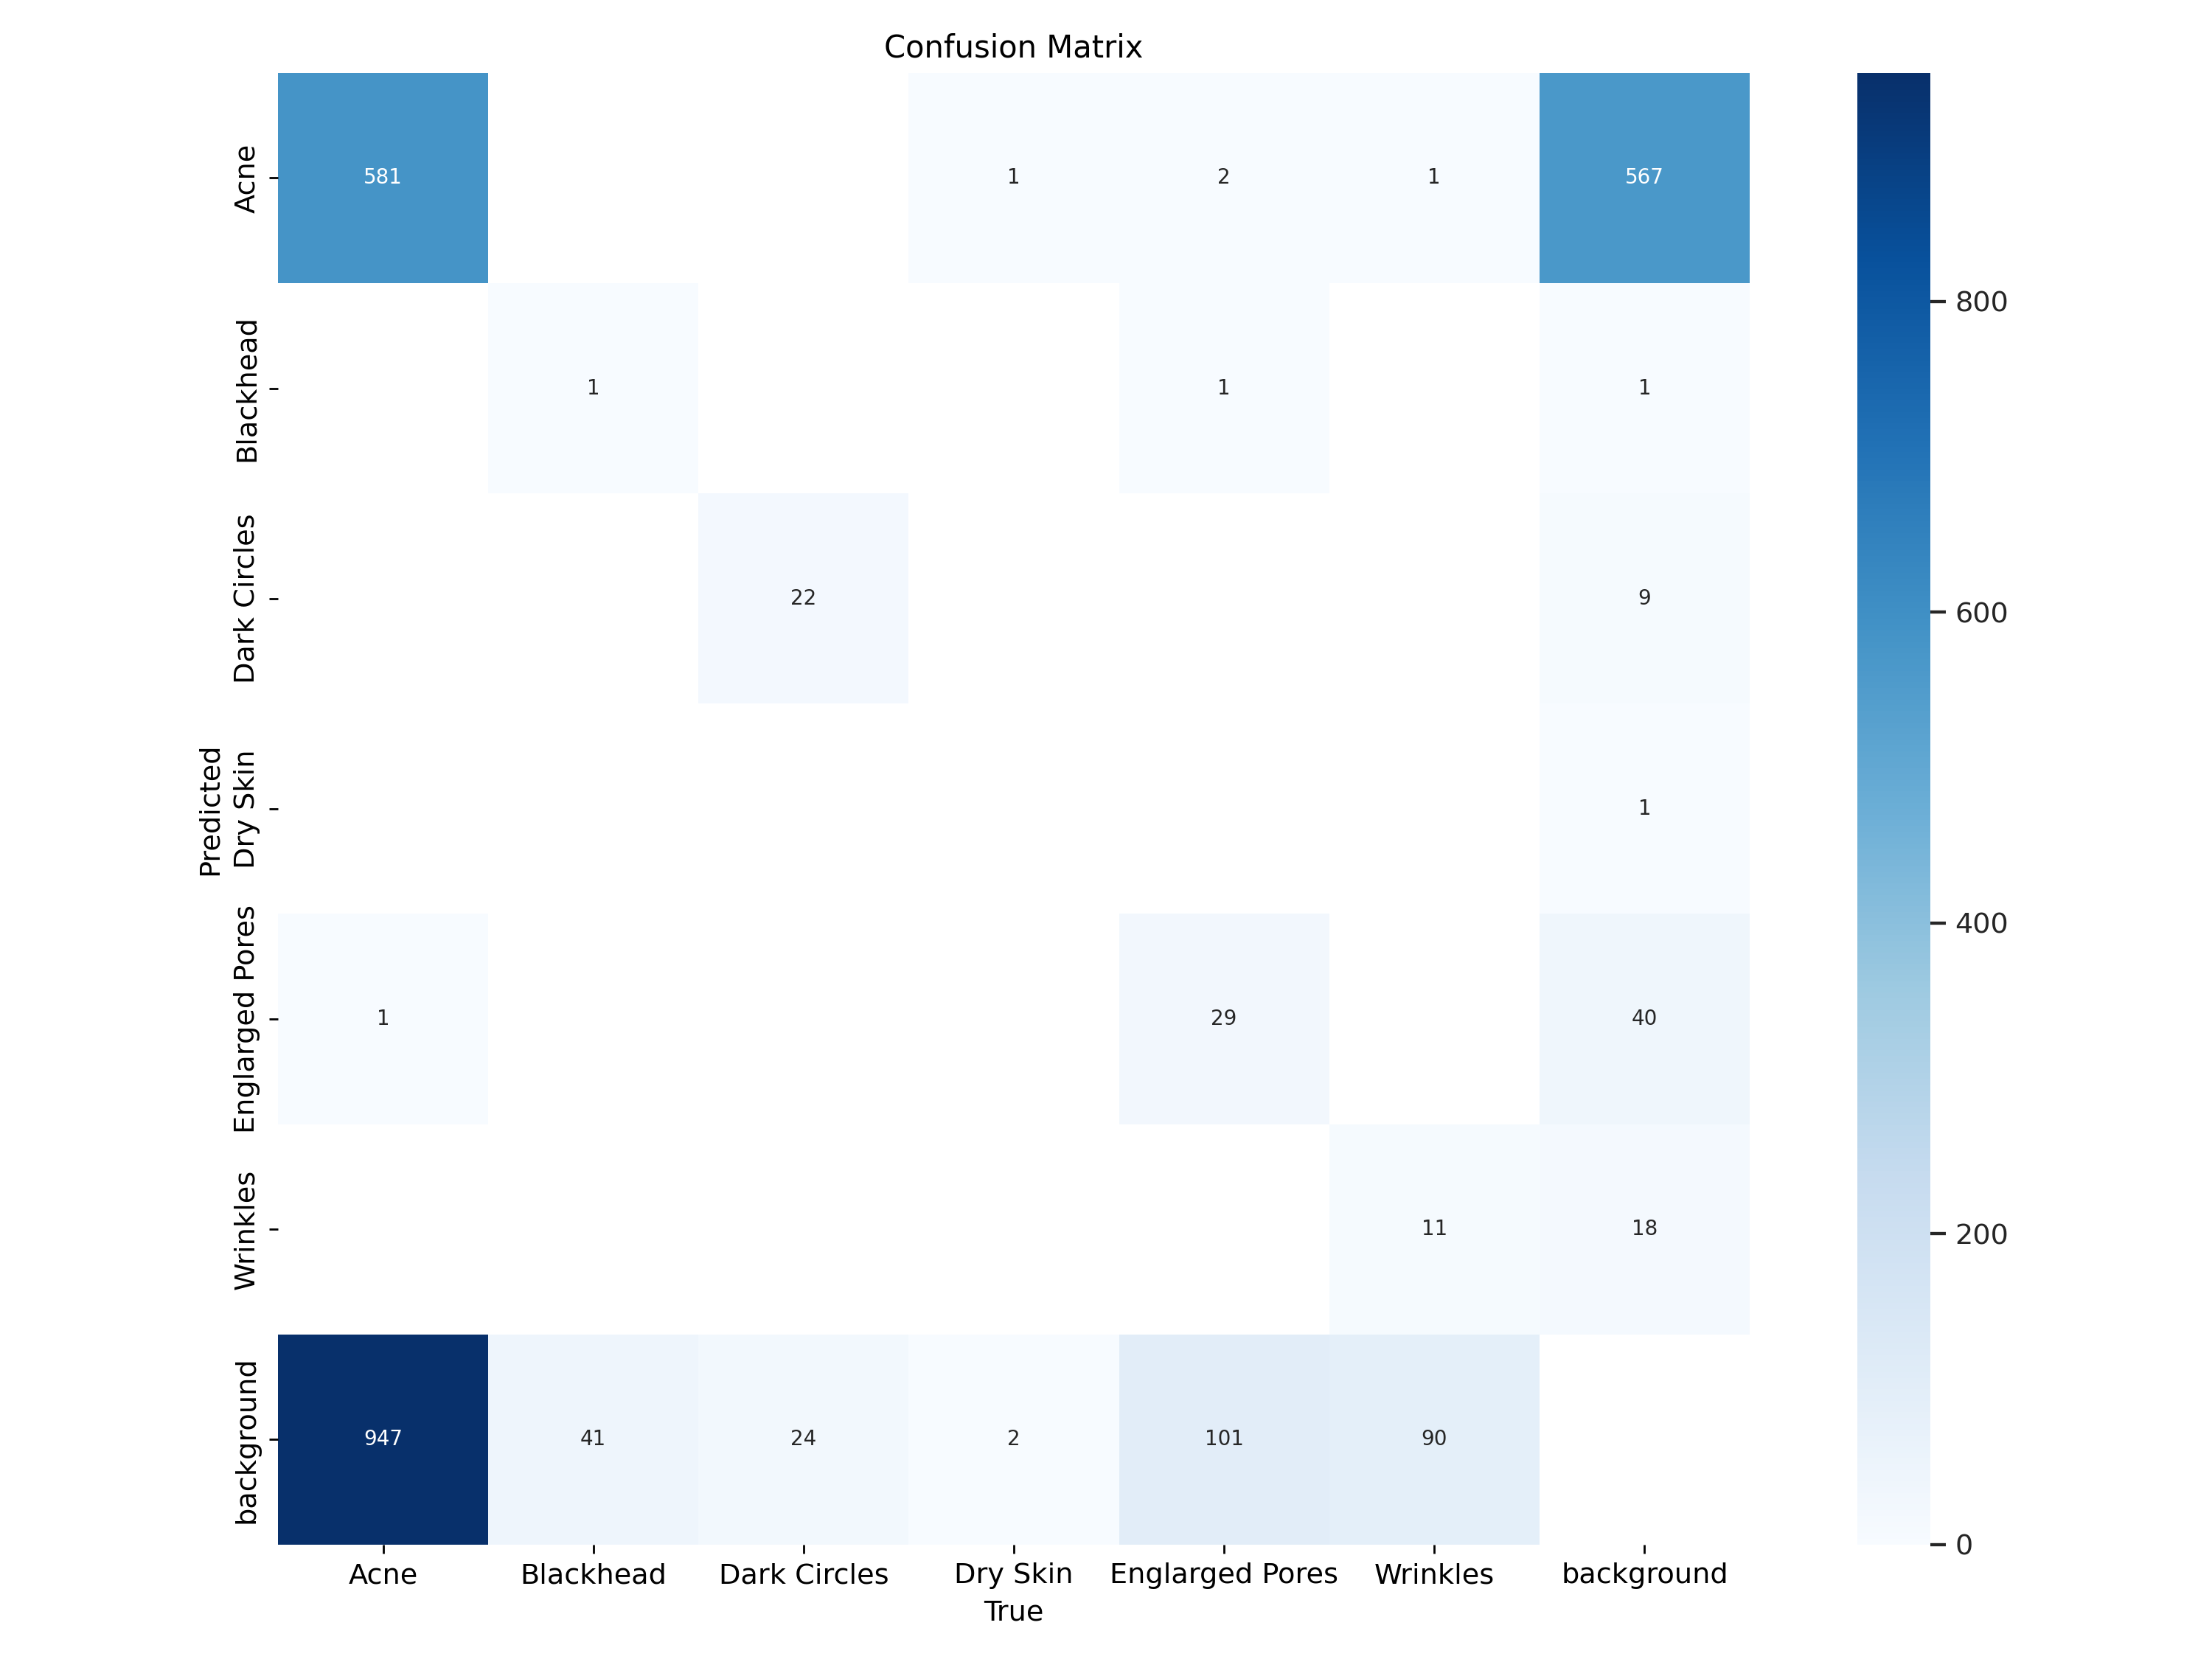

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [10]:
# data validasi
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Skin-Problems-Detection-9/valid/labels.cache... 137 images, 0 backgrounds, 0 corrupt: 100% 137/137 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:20<00:00,  2.28s/it]
                   all        137       1855      0.247      0.237      0.199     0.0767
                  Acne        128       1529      0.319      0.435      0.305     0.0885
             Blackhead         23         42     0.0496     0.0238     0.0337     0.0183
          Dark Circles         28         46      0.653      0.565      0.603      0.283
              Dry Skin          3          3          0          0          0          0
       Englarged Pores         64        133      0.256      0.271      0.171     0.0438
              Wri

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/69 /content/datasets/Skin-Problems-Detection-9/test/images/108_jpg.rf.326dd5c8c5488c5515da1803cd8cbeb6.jpg: 800x800 2 Acnes, 22.6ms
image 2/69 /content/datasets/Skin-Problems-Detection-9/test/images/11_jpg.rf.07d92630b0333834b76e402e9152c2dc.jpg: 800x800 7 Acnes, 22.7ms
image 3/69 /content/datasets/Skin-Problems-Detection-9/test/images/134_jpg.rf.d88e6307f513e2d0ed2fffc63d284c70.jpg: 800x800 1 Acne, 22.6ms
image 4/69 /content/datasets/Skin-Problems-Detection-9/test/images/138_jpg.rf.b37b16a2ca1cb6099de240133baa8389.jpg: 800x800 9 Acnes, 1 Dark Circles, 22.7ms
image 5/69 /content/datasets/Skin-Problems-Detection-9/test/images/140_jpg.rf.cb7c8b422db65b4d3d94c90a91ba4bad.jpg: 800x800 6 Acnes, 22.6ms
image 6/69 /content/datasets/Skin-Problems-Detection-9/test/images/142_jpg.rf.9f9ea2e100db08ccddbbddfc91c067

/content


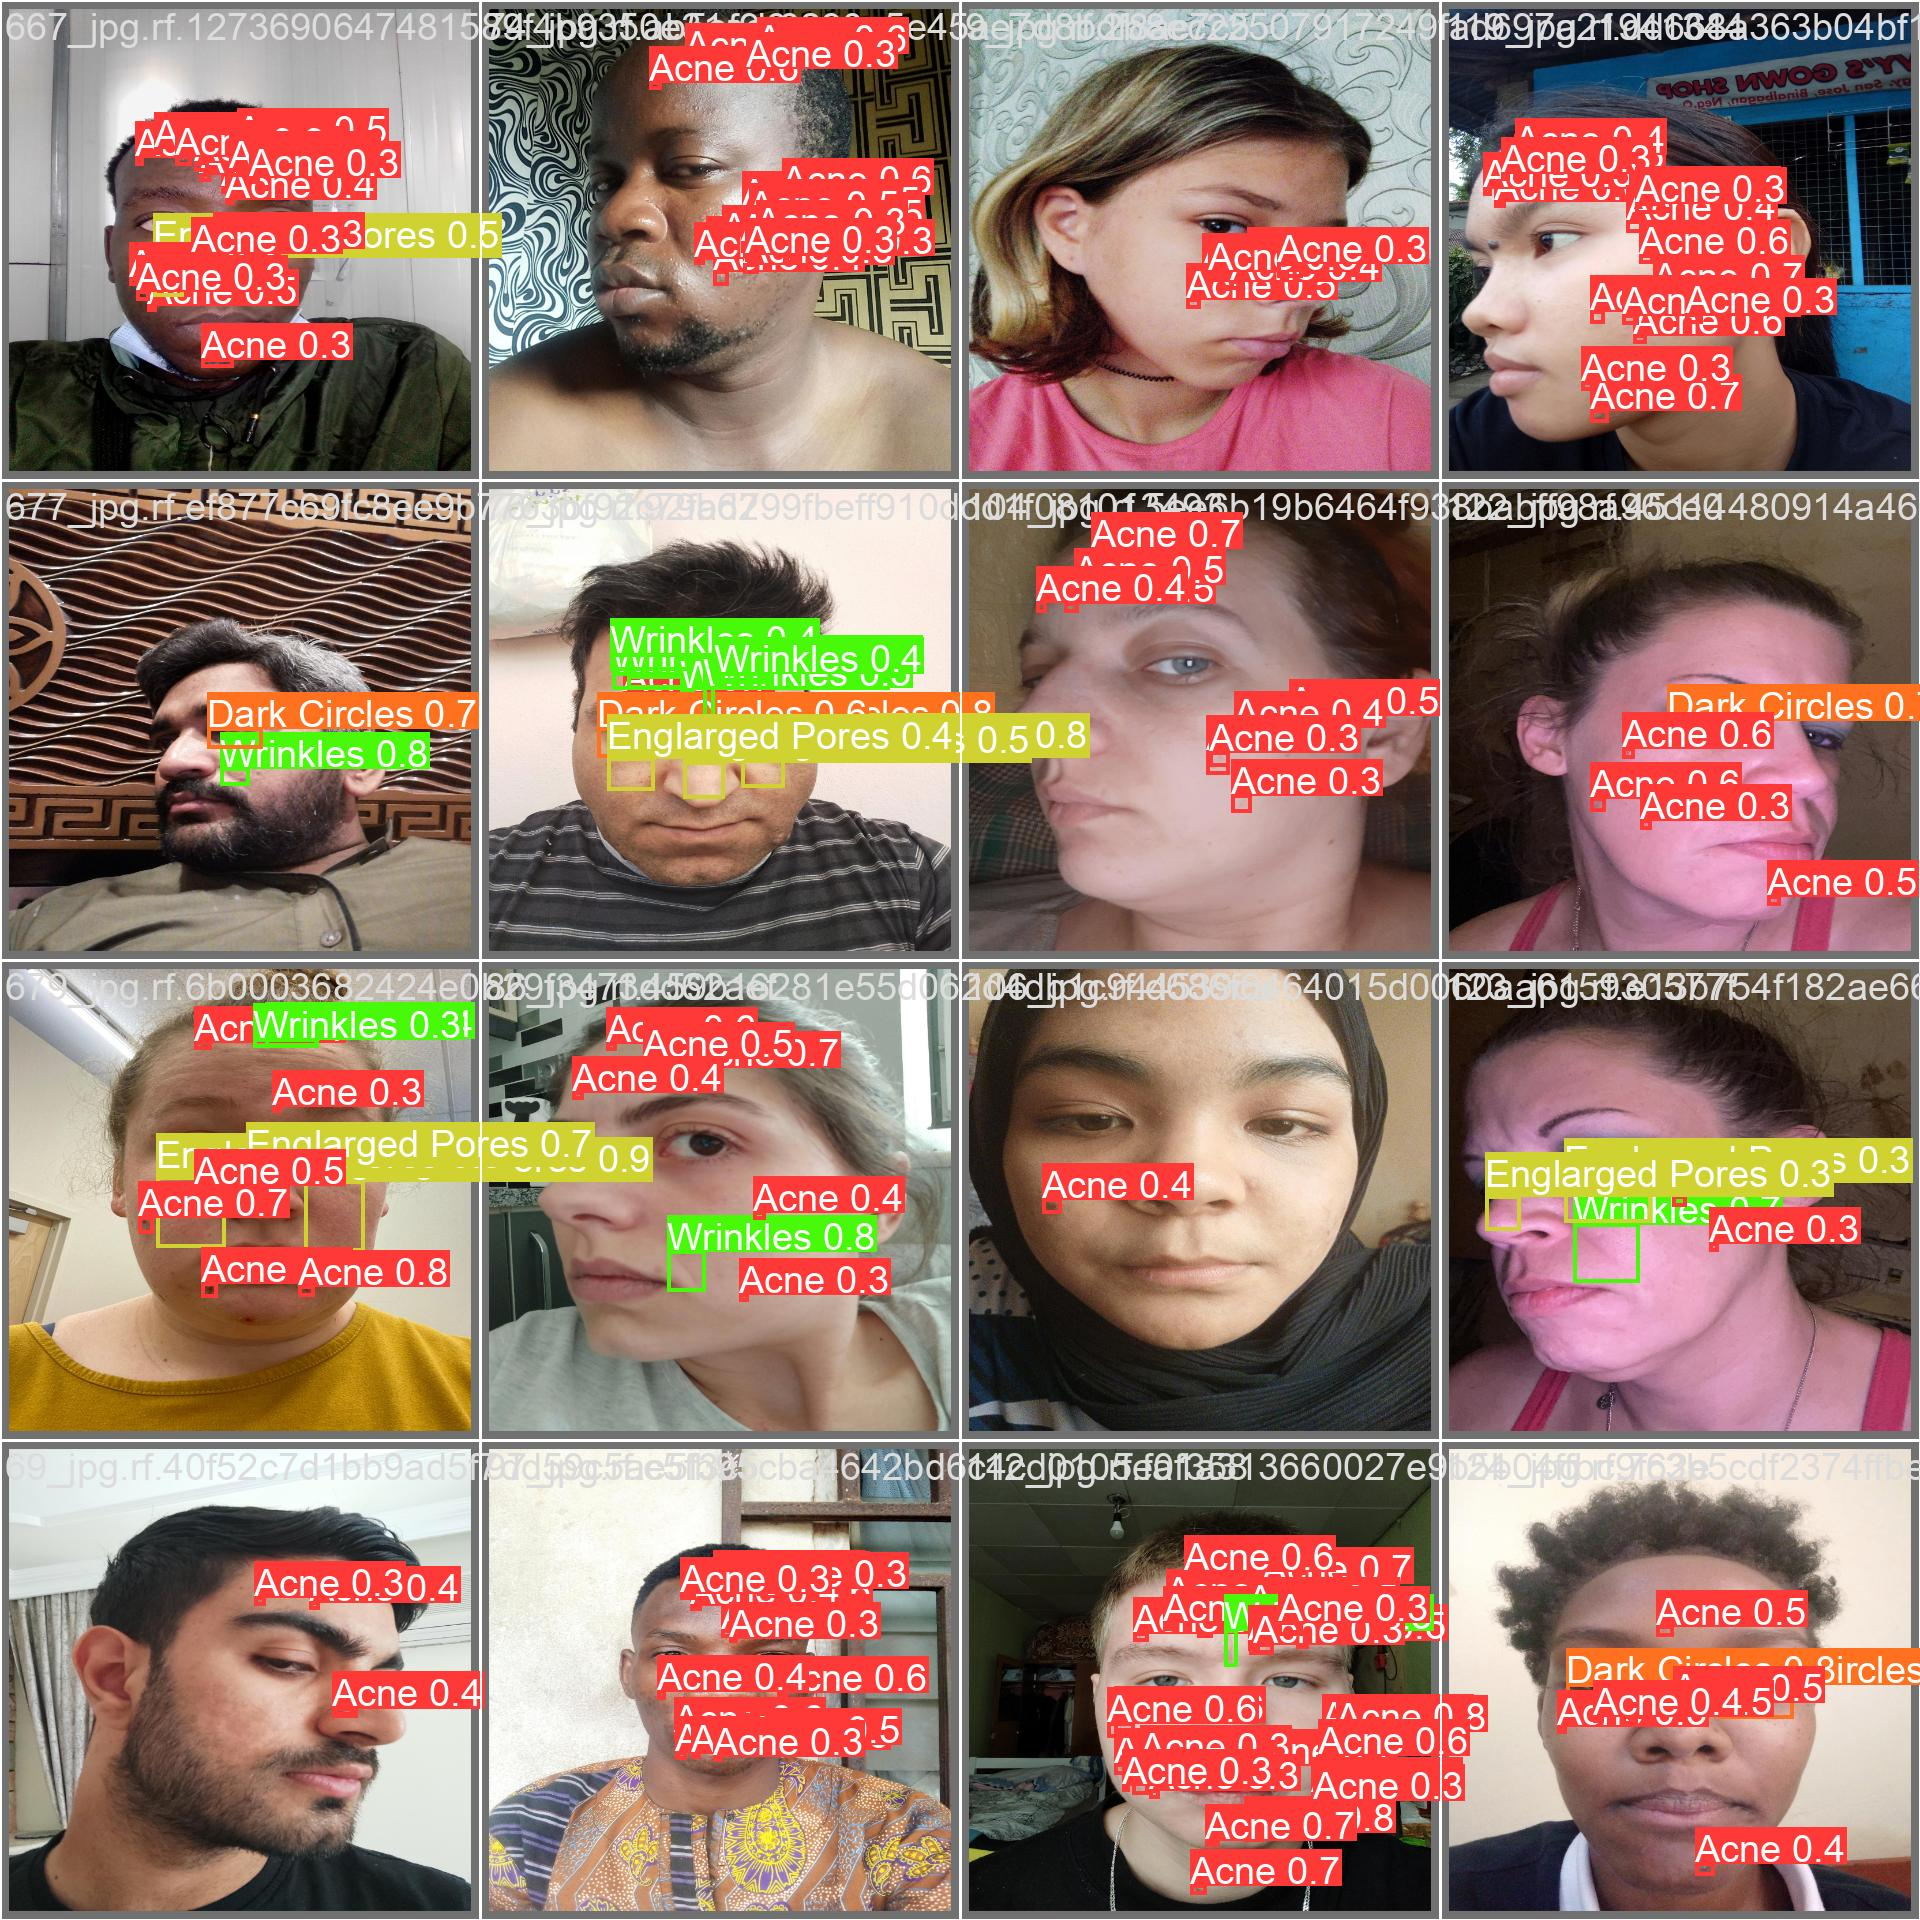

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Export

In [12]:
folder_path = '/content/runs/detect/train/'
zip_path = '/content/D2M4_50_800.zip'
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
best_model_path = 'runs/detect/train/weights/best.pt'
shutil.copy(best_model_path, 'D2M4_50_800.pt')
files.download('D2M4_50_800.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model('/content/D2M4_25_416.h5')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path ke gambar yang akan diprediksi
image_path = '/content/datasets/Skin-Problems-Detection-9/test/images/108_jpg.rf.326dd5c8c5488c5515da1803cd8cbeb6.jpg'

# Muat gambar
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Ubah ukuran gambar sesuai dengan input yang diharapkan model
image_resized = cv2.resize(image, (sz_img, sz_img))  # Sesuaikan dengan input model Anda
image_array = np.expand_dims(image_resized, axis=0)  # Tambahkan dimensi batch

# Normalisasi gambar (jika model Anda memerlukan ini, sesuaikan dengan preprocessing yang digunakan saat pelatihan)
image_array = image_array / 255.0
# Lakukan prediksi
predictions = model.predict(image_array)

# Cetak hasil prediksi
print(predictions)
